# **Dataset and Loading Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv('/content/housing_data.csv')
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

<Figure size 1000x600 with 0 Axes>

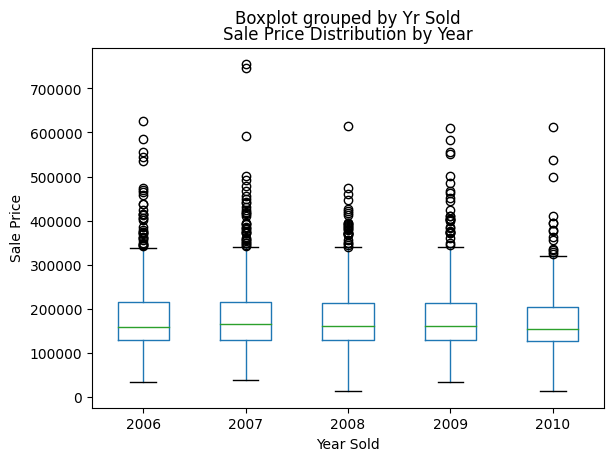

In [ ]:
#checking bias in dataset

import pandas as pd
from scipy.stats import kruskal
import matplotlib.pyplot as plt

# Check if 'Yr Sold' and 'SalePrice' columns exist
print(df.columns)

# Filter data for the 'Yr Sold' and 'SalePrice' columns
years = df['Yr Sold'].unique()
price_data = [df[df['Yr Sold'] == year]['SalePrice'] for year in years]

# Perform Kruskal-Wallis H-test
stat, p = kruskal(*price_data)

print(f"Kruskal-Wallis H-test statistic: {stat}, p-value: {p}")

# Interpret the significance
alpha = 0.05  # Set a standard alpha level for statistical significance
if p < alpha:
    print("Reject the null hypothesis - Significant differences exist between years.")
else:
    print("Fail to reject the null hypothesis - No significant difference between years.")

# Optional: Plot the data
plt.figure(figsize=(10, 6))
df.boxplot(column='SalePrice', by='Yr Sold', grid=False)
plt.title('Sale Price Distribution by Year')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()


In [ ]:
df.isna().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [ ]:
# Notice multiple NaN values.
df['Alley'].fillna("No Alley Access", inplace=True)
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,No Alley Access,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,No Alley Access,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,No Alley Access,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,No Alley Access,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,No Alley Access,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,No Alley Access,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,No Alley Access,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,No Alley Access,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,No Alley Access,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
# NaN values in the dataframe do not mean null values. It just means that they don't have the feature so it cannot be dropped.
# Manipulating Null values to their actual corresponding string vals. For example NaN in Alley column actually means that
# there's no alley access.

df['Bsmt Qual'].fillna("No Basement", inplace=True)
df['Bsmt Cond'].fillna("No Basement", inplace=True)
df['Bsmt Exposure'].fillna("No Basement", inplace=True)
df['BsmtFin Type 1'].fillna("No Basement", inplace=True)
df['BsmtFin Type 2'].fillna("No Basement", inplace=True)
df['Fireplace Qu'].fillna("No Fireplace", inplace=True)
df['Garage Type'].fillna("No Garage", inplace=True)
df['Garage Finish'].fillna("No Garage", inplace=True)
df['Garage Qual'].fillna("No Garage", inplace=True)
df['Garage Cond'].fillna("No Garage", inplace=True)
df['Pool QC'].fillna("No Pool", inplace=True)
df['Fence'].fillna("No Fence", inplace=True)
df['Misc Feature'].fillna("No Misc Feature", inplace=True)
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,No Alley Access,IR1,Lvl,...,0,No Pool,No Fence,No Misc Feature,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,No Alley Access,Reg,Lvl,...,0,No Pool,MnPrv,No Misc Feature,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,No Alley Access,IR1,Lvl,...,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,No Alley Access,Reg,Lvl,...,0,No Pool,No Fence,No Misc Feature,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,No Alley Access,IR1,Lvl,...,0,No Pool,MnPrv,No Misc Feature,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,No Alley Access,IR1,Lvl,...,0,No Pool,GdPrv,No Misc Feature,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,No Alley Access,IR1,Low,...,0,No Pool,MnPrv,No Misc Feature,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,No Alley Access,Reg,Lvl,...,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,No Alley Access,Reg,Lvl,...,0,No Pool,No Fence,No Misc Feature,0,4,2006,WD,Normal,170000


In [ ]:
#change the year built and year remodified to the age

from datetime import datetime
current_year = datetime.now().year
df['Age_Built'] = current_year - df['Year Built']
df.drop('Year Built', axis=1, inplace=True)

In [ ]:
df['Age_Remodified'] = current_year - df['Year Remod/Add']
df.drop('Year Remod/Add', axis=1, inplace=True)

In [ ]:
# Now we can check for the actual NaN values that don't matter
pd.set_option('display.max_rows', 100)
df.isna().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley                 0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type       1775
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          1
BsmtFin Type 2        0
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air           0
Electrical      

In [ ]:
# Realize that Veneer type has lot of NaN as well but they just mean that there's no veneer. So if someone is buying the house
# they would probably have to pay extra to get a brick, wood etc. type of veneer. So this column is important and cannot be
# dropped.

df['Mas Vnr Type'].fillna("No Veneer", inplace=True)
df.isna().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley                0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin SF 1         1
BsmtFin Type 2       0
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF 

Overall, frontage is an important aspect of a property's value and potential use, as it determines the amount of
land that is adjacent to a street or highway and can affect the property's accessibility and visibility.
Decide whether value to be put in lot frontage is 0 or mean of all the values.

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical = df.select_dtypes(include=['object'])
categorical_encoded = categorical.apply(le.fit_transform)

numerical = df.select_dtypes(exclude=['object'])
df = pd.concat([numerical, categorical_encoded], axis=1)


In [ ]:
df['Exterior 2nd'].value_counts()

Exterior 2nd
14    1015
8      447
6      406
15     397
10     274
5      126
16      81
13      47
3       47
0       38
2       22
7       15
12       6
1        4
4        3
11       1
9        1
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Mas Vnr Area     2907 non-null   float64
 8   BsmtFin SF 1     2929 non-null   float64
 9   BsmtFin SF 2     2929 non-null   float64
 10  Bsmt Unf SF      2929 non-null   float64
 11  Total Bsmt SF    2929 non-null   float64
 12  1st Flr SF       2930 non-null   int64  
 13  2nd Flr SF       2930 non-null   int64  
 14  Low Qual Fin SF  2930 non-null   int64  
 15  Gr Liv Area      2930 non-null   int64  
 16  Bsmt Full Bath   2928 non-null   float64
 17  Bsmt Half Bath

In [ ]:
# Checking for NaN values
df.isna().sum()

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
Age_Built            0
Age_Remodified       0
MS Zoning            0
Street               0
Alley                0
Lot Shape            0
Land Contou

In [ ]:
# Lot frontage is important and there are too many data points so we can't drop it. Filling the NaN values with the mean.

df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), inplace=True)
df.isna().sum()

Order                0
PID                  0
MS SubClass          0
Lot Frontage         0
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
Age_Built            0
Age_Remodified       0
MS Zoning            0
Street               0
Alley                0
Lot Shape            0
Land Contou

In [ ]:
# Doing the same for a couple of other columns

df['Garage Yr Blt'].fillna(0, inplace=True)
df['Mas Vnr Area'].fillna(0, inplace=True)
df.isna().sum()

Order              0
PID                0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Mas Vnr Area       0
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     2
Bsmt Half Bath     2
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        1
Garage Area        1
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
Age_Built          0
Age_Remodified     0
MS Zoning          0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood 

In [ ]:
df['YearsSinceSold'] = current_year - df['Yr Sold']
df.drop(columns=['Yr Sold'], inplace=True)
df['GarageAge'] = current_year - df['Garage Yr Blt']
df.drop(columns=['Garage Yr Blt'], inplace=True)

In [ ]:
#Area calculation
df = df.rename(columns={'Gr Liv Area': 'TotalLivingArea'});

# dropping columns that are in calculated fields
df.drop(columns=['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'], inplace=True)
print(df.columns)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'Total Bsmt SF',
       'TotalLivingArea', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'SalePrice', 'Age_Built',
       'Age_Remodified', 'MS Zoning', 'Street', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',

In [ ]:
# Finding the mean of the sale prices in the dataset
df['SalePrice'].mean()

180796.0600682594

# **Outliers**

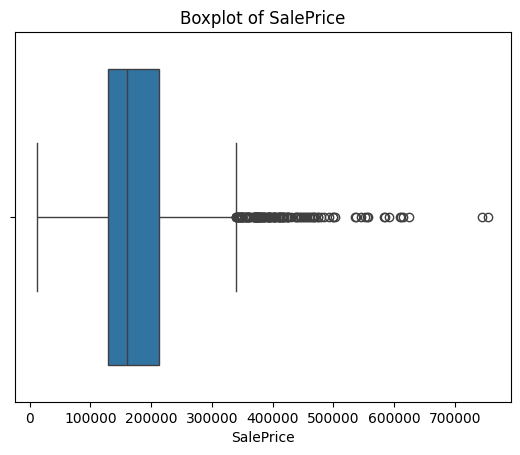

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.show()

In [ ]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['SalePrice']))

# Consider data points with a Z-score above 3 as outliers
outliers_z = df[z_scores > 3]
print(outliers_z['SalePrice'])

15      538000
44      611657
46      500000
366     501837
421     462000
422     485000
423     555000
431     451950
432     610000
433     582933
448     445000
456     552000
513     468000
968     425000
1051    426000
1053    446261
1059    460000
1063    615000
1067    421250
1425    475000
1637    591587
1641    441929
1642    455000
1691    492000
1693    450000
1695    479069
1699    440000
1701    500067
1760    745000
1763    466500
1767    755000
1772    430000
2097    424870
2329    457347
2330    545224
2332    556581
2334    535000
2336    438780
2341    470000
2382    465000
2400    437154
2445    625000
2450    584500
2456    423000
2666    475000
Name: SalePrice, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#New dataframe for outliers
outliers_df = df[z_scores > 3]

# Assuming you have selected relevant features and stored them in X_outliers
# Also assuming the target variable (SalePrice) is stored in y_outliers
X_outliers = outliers_df.drop(columns=['SalePrice'])
y_outliers = outliers_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_outliers, y_outliers, test_size=0.3, random_state=42)

# Train a linear regression model
model_outliers = LinearRegression()
model_outliers.fit(X_train, y_train)

y_pred = model_outliers.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_outliers = mse ** 0.5
print("RMSE for outliers:", rmse_outliers.round(3))

RMSE for outliers: 57808.651


# **Data Visualisation**

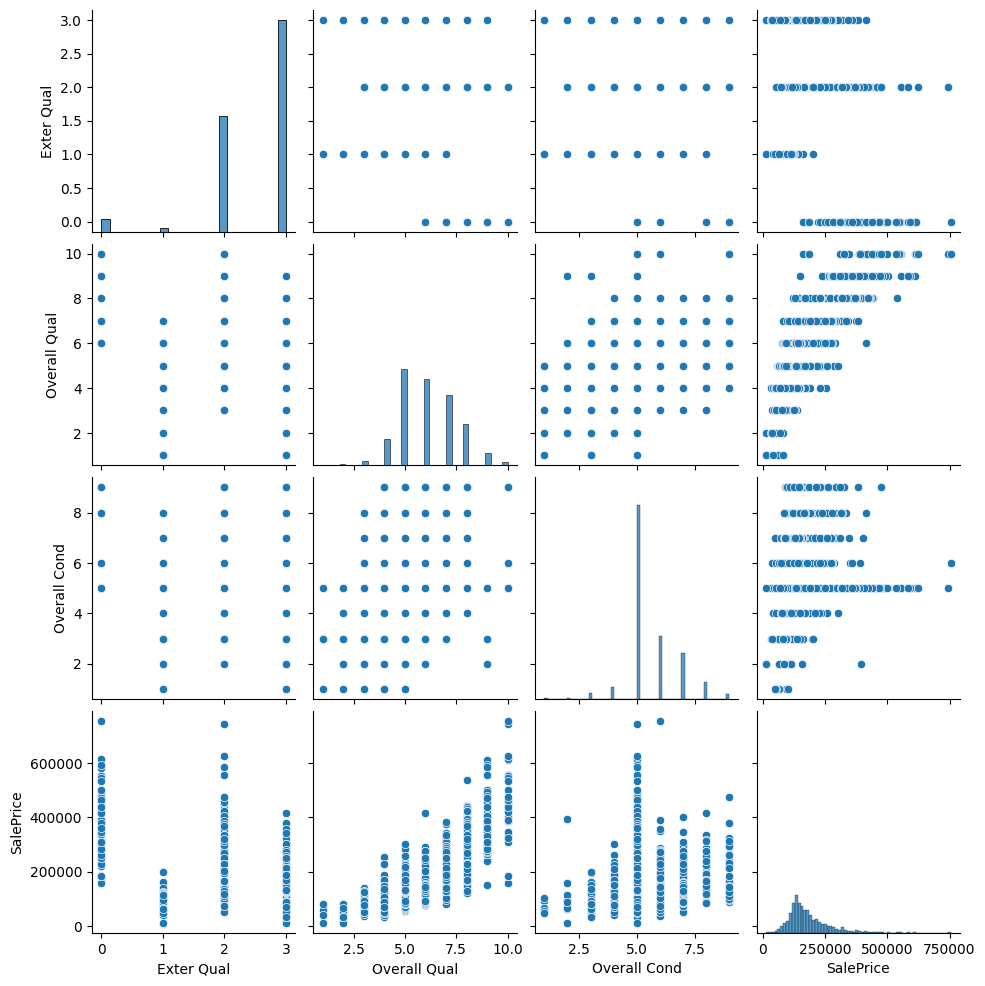

In [ ]:
#visualising corr between condition and quality with sale price
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame with relevant columns
plot_data = df[['Exter Qual', 'Overall Qual', 'Overall Cond', 'SalePrice']]

sns.pairplot(data=plot_data, kind='scatter')
plt.show()

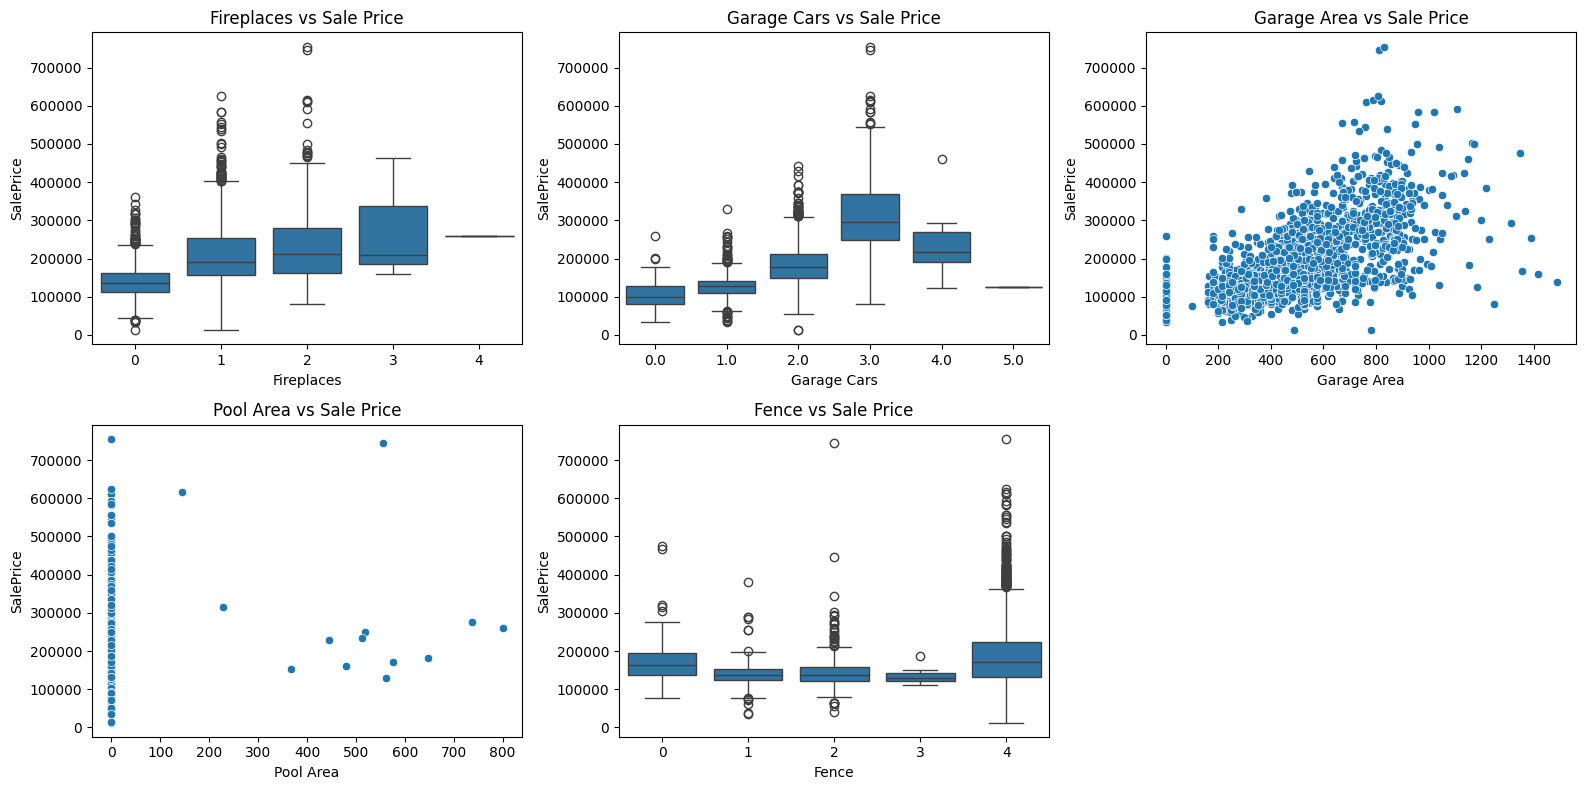

In [ ]:
# Amenities and extras columns
amenities_cols = ['Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Cars', 'Garage Area', 'Pool Area', 'Pool QC', 'Fence', 'SalePrice']

# Subsetting the DataFrame
amenities_data = df[amenities_cols].copy()

# Plotting
plt.figure(figsize=(16, 8))

# Box plot for Fireplaces
plt.subplot(2, 3, 1)
sns.boxplot(x='Fireplaces', y='SalePrice', data=amenities_data)
plt.title('Fireplaces vs Sale Price')

# Box plot for Garage Cars
plt.subplot(2, 3, 2)
sns.boxplot(x='Garage Cars', y='SalePrice', data=amenities_data)
plt.title('Garage Cars vs Sale Price')

# Box plot for Garage Area
plt.subplot(2, 3, 3)
sns.scatterplot(x='Garage Area', y='SalePrice', data=amenities_data)
plt.title('Garage Area vs Sale Price')

# Box plot for Pool Area
plt.subplot(2, 3, 4)
sns.scatterplot(x='Pool Area', y='SalePrice', data=amenities_data)
plt.title('Pool Area vs Sale Price')

# Box plot for Fence
plt.subplot(2, 3, 5)
sns.boxplot(x='Fence', y='SalePrice', data=amenities_data)
plt.title('Fence vs Sale Price')

plt.tight_layout()
plt.show()

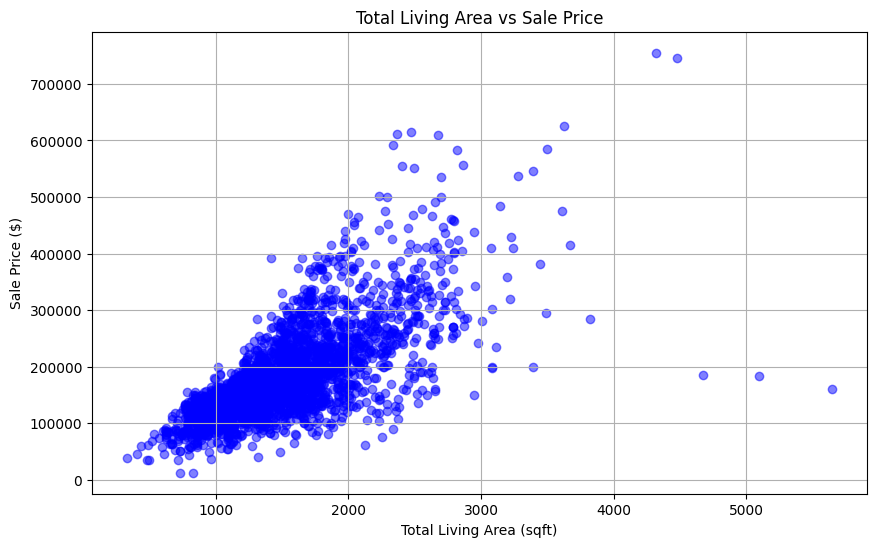

In [ ]:
#plot of total living area and sale price
total_living_area = df['TotalLivingArea']
sale_price = df['SalePrice']

plt.figure(figsize=(10, 6))
plt.scatter(total_living_area, sale_price, color='blue', alpha=0.5)
plt.title('Total Living Area vs Sale Price')
plt.xlabel('Total Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()

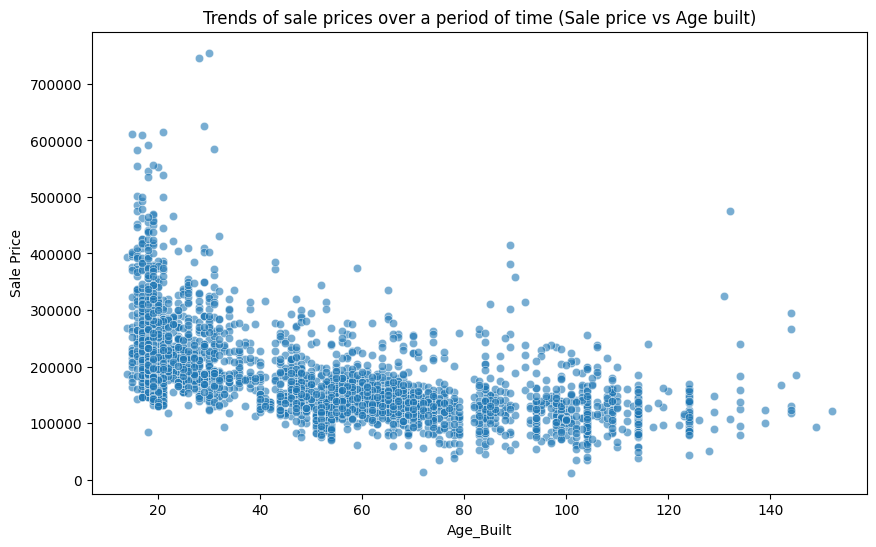

In [ ]:
#Let's see some trends of sale prices over a period of time
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_Built', y='SalePrice', data = df, alpha = 0.6 )
plt.title('Trends of sale prices over a period of time (Sale price vs Age built)')
plt.xlabel('Age_Built')
plt.ylabel('Sale Price')
plt.show()

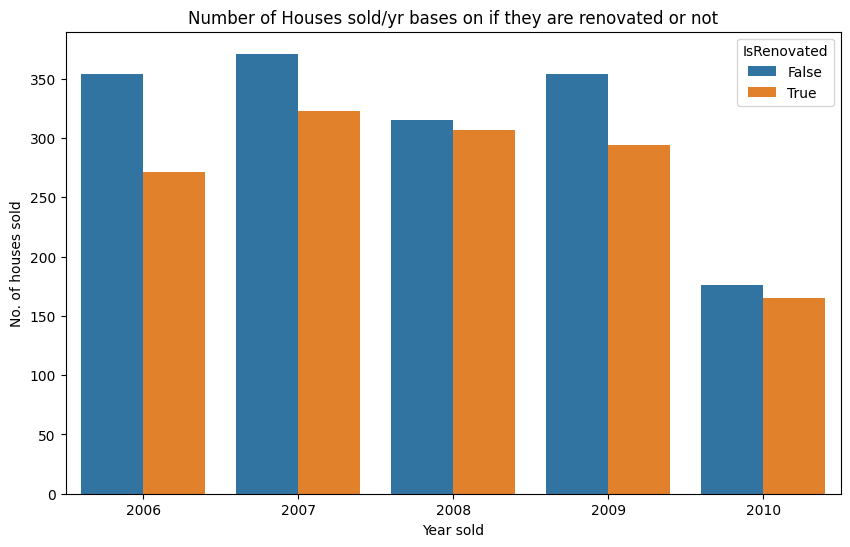

In [ ]:
#effect of renovation on number of houses sold.
data = df
data['IsRenovated']= data['Age_Remodified']<data['Age_Built']
data['Yr Sold'] = current_year - data['YearsSinceSold']
plt.figure(figsize=(10,6))
sns.countplot(x='Yr Sold', hue= 'IsRenovated', data=data)
plt.title('Number of Houses sold/yr bases on if they are renovated or not')
plt.xlabel('Year sold')
plt.ylabel('No. of houses sold')
plt.show()

In [ ]:
data=df
neighborhood_replacement = {
    'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6,
    'Crawfor': 7, 'Edwards': 8, 'Gilbert': 9, 'Greens': 10, 'GrnHill': 11, 'IDOTRR': 12,
    'Landmrk': 13, 'MeadowV': 14, 'Mitchel': 15, 'NAmes': 16, 'NoRidge': 17, 'NPkVill': 18,
    'NridgHt': 19, 'NWAmes': 20, 'OldTown': 21, 'SWISU': 22, 'Sawyer': 23, 'SawyerW': 24,
    'Somerst': 25, 'StoneBr': 26, 'Timber': 27, 'Veenker': 28
}

# Inverse the dictionary to map numbers back to neighborhood names
inverse_neighborhood = {v: k for k, v in neighborhood_replacement.items()}
print(inverse_neighborhood)

# Apply the inverse mapping to your 'Neighborhood' column for plotting
data['NeighborhoodName'] = data['Neighborhood'].map(inverse_neighborhood)

{1: 'Blmngtn', 2: 'Blueste', 3: 'BrDale', 4: 'BrkSide', 5: 'ClearCr', 6: 'CollgCr', 7: 'Crawfor', 8: 'Edwards', 9: 'Gilbert', 10: 'Greens', 11: 'GrnHill', 12: 'IDOTRR', 13: 'Landmrk', 14: 'MeadowV', 15: 'Mitchel', 16: 'NAmes', 17: 'NoRidge', 18: 'NPkVill', 19: 'NridgHt', 20: 'NWAmes', 21: 'OldTown', 22: 'SWISU', 23: 'Sawyer', 24: 'SawyerW', 25: 'Somerst', 26: 'StoneBr', 27: 'Timber', 28: 'Veenker'}


<ipython-input-28-dad3593d44d2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_prices.values, y=neighborhood_prices.index, palette=sorted_colors)


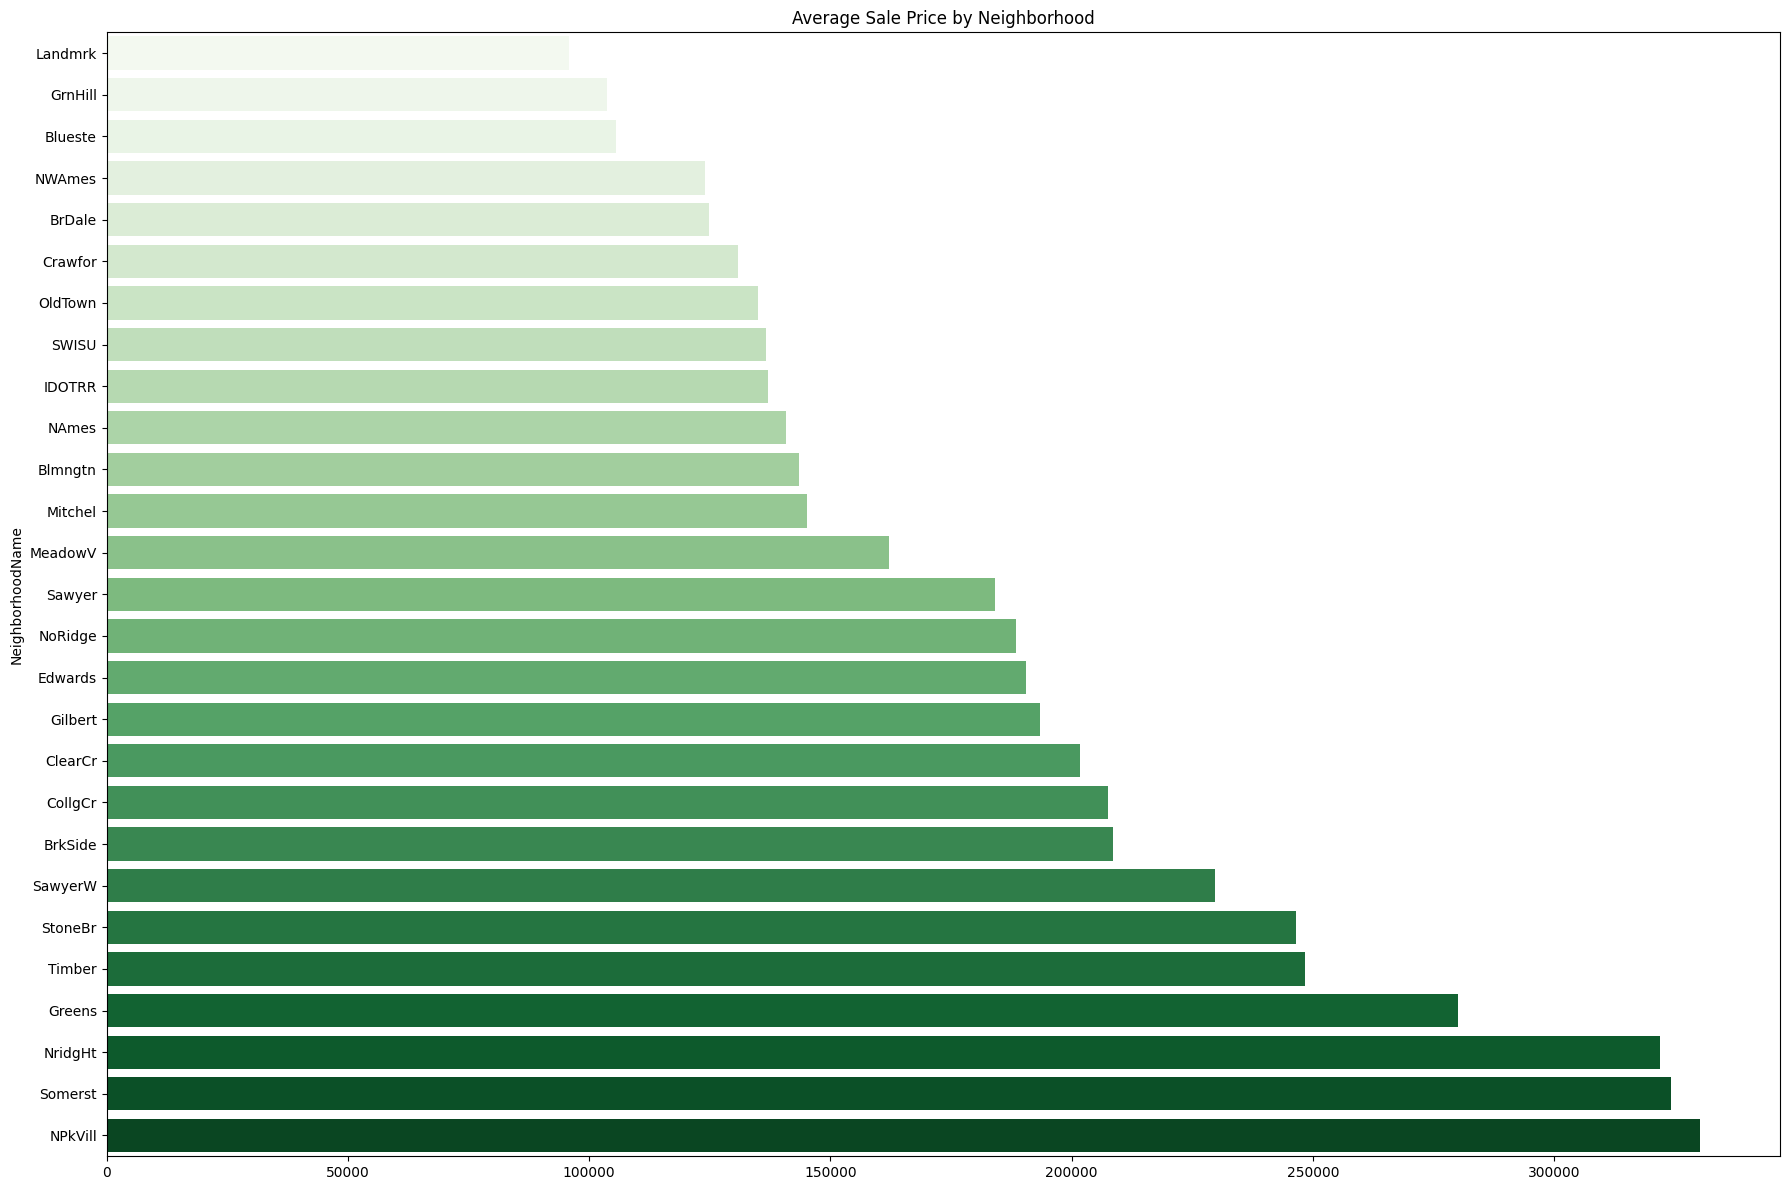

In [ ]:
# Assuming 'data' is your DataFrame and 'NeighborhoodName' & 'SalePrice' are columns in your DataFrame
neighborhood_prices = data.groupby('NeighborhoodName')['SalePrice'].mean().sort_values()
colors = sns.color_palette("Greens", len(neighborhood_prices))

# Sort the colors by the values to ensure they match
sorted_colors = [colors[i] for i in neighborhood_prices.argsort()]

plt.figure(figsize=(18, 12))
sns.barplot(x=neighborhood_prices.values, y=neighborhood_prices.index, palette=sorted_colors)
plt.title('Average Sale Price by Neighborhood')
plt.tight_layout()
plt.show()

**Business insights:**
1.Target Market for Real estate agents: Agents can tailor their marketing strategies based on the price brackets in different neighborhoods.
2.Investment Focus: Investors can identify neighborhoods with higher average sale prices as potential areas for investment.

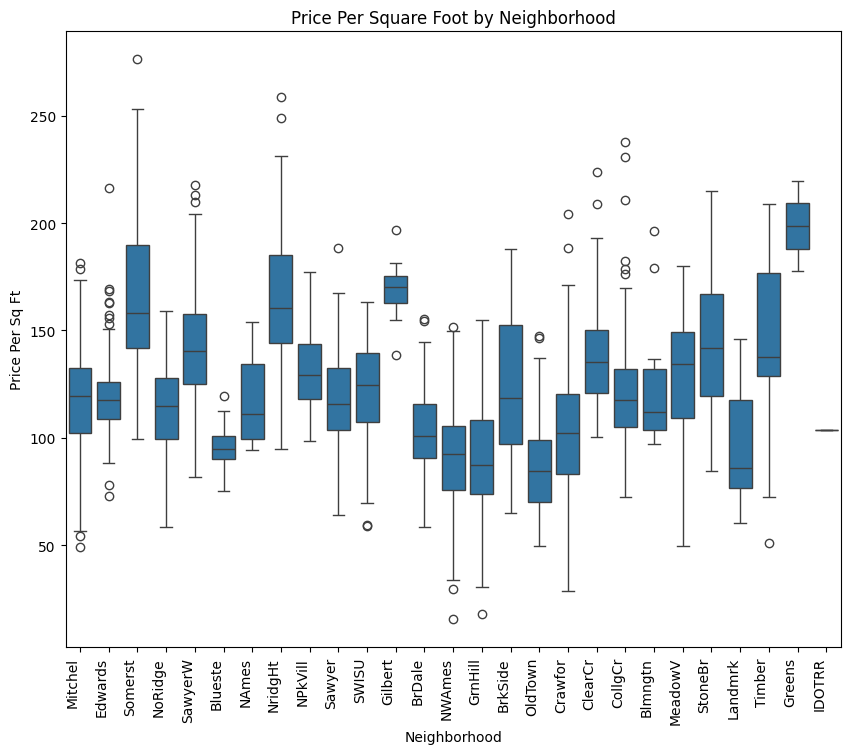

In [ ]:
data['PricePerSqFit'] = data['SalePrice']/data['TotalLivingArea']
plt.figure(figsize=(10,8))
sns.boxplot(x='NeighborhoodName', y='PricePerSqFit', data = data)
plt.title('Price Per Square Foot by Neighborhood')
plt.xticks(rotation=90, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Price Per Sq Ft')
plt.show()

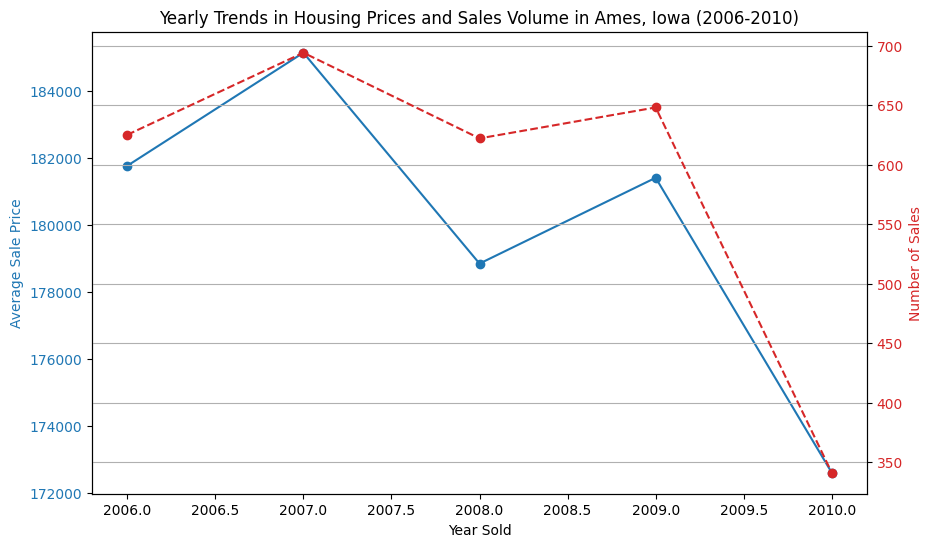

In [ ]:
# Extract year and sale price for trend analysis
import pandas as pd
import matplotlib.pyplot as plt

current_year = 2024
# Recreate 'Yr Sold' from 'YearsSinceSold'
data['Yr Sold'] = current_year - data['YearsSinceSold']

# Aggregate data by 'Yr Sold' to get mean and count of 'SalePrice'
yearly_data = data.groupby('Yr Sold')['SalePrice'].agg(['mean', 'count'])

# Set up the figure for dual-axis plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Average Sale Price per year
color = 'tab:blue'
ax1.set_xlabel('Year Sold')
ax1.set_ylabel('Average Sale Price', color=color)
ax1.plot(yearly_data.index, yearly_data['mean'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for number of sales
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Sales', color=color)
ax2.plot(yearly_data.index, yearly_data['count'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Title and show plot
plt.title('Yearly Trends in Housing Prices and Sales Volume in Ames, Iowa (2006-2010)')
plt.grid(True)
plt.show()

There is a noticeable dip in the average sale price from 2007 to 2008, which coincides with the global financial crisis that
significantly impacted real estate markets worldwide. This suggests that Ames was not immune to the broader economic downturn.
Following 2008, average sale prices appear to stabilize and slightly increase by 2010, indicating some recovery in the market.

# Correlation Matrix

In [ ]:
# correlations with SalePrice
print(df.columns)
df.drop(columns=['NeighborhoodName'],inplace=True)
corr_with_saleprice = df.corr()['SalePrice']

# Sort correlations in descending order
corr_with_saleprice = corr_with_saleprice.sort_values(ascending=False)
print(corr_with_saleprice)
# Plot correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_with_saleprice.to_frame(), annot=True, fmt=".2f", cmap="RdBu", center=0, vmin=-1, vmax=1)
plt.title('Correlation with SalePrice')
plt.show()

NameError: name 'df' is not defined

We can see maximum correlation between - Overall quality, overall cond, Garage features, basement area, foundation fireplace - +ve correlarion

Negative - exterior quality, kithcn equal, age remodified, age built (makes sense)

Close to 0 with Roof, PPool, Utilities, Misc val, Porch Lot config, Bldf type, sale type (Can probably drop these)

We need to validate with different methods.

# **Model Fitting**

In [ ]:
# unrelated column

df_new = df.drop(columns=['BsmtFin Type 2', 'Roof Matl', 'Pool Area', 'Land Slope',
                 'Street', 'Condition 2', 'Mo Sold', '3Ssn Porch',
                 'YearsSinceSold', 'Misc Val', 'Utilities', 'Land Contour',
                 'Sale Type', 'Bldg Type', 'Lot Config', 'Misc Feature',
                 'MS SubClass', 'Order', 'PID', 'Neighborhood'])

In [ ]:
df_new.columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Mas Vnr Area', 'Total Bsmt SF', 'TotalLivingArea', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       'Screen Porch', 'SalePrice', 'Age_Built', 'Age_Remodified', 'MS Zoning',
       'Alley', 'Lot Shape', 'Condition 1', 'House Style', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC',
       'Fence', 'Sale Condition', 'GarageAge', 'IsRenovated', 'Yr Sold',
       'PricePerSqFit'],
      dtype='object'

**Base line model**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming df_new is defined and SalePrice is a column in df_new
df_new.dropna(inplace=True)

X = df_new.drop(columns=['SalePrice'])
y = df_new['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Baseline predictions
mean_y_train = y_train.mean()
y_pred_baseline = np.full(shape=y_test.shape, fill_value=mean_y_train)

# Calculate RMSE for the baseline model
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
print("Baseline Model Root Mean Squared Error:", baseline_rmse.round(3))

# Function to perform cross-validation for both MSE and MAE
def baseline_cross_val_score(X, y, cv):
    mean_y = y.mean()
    mse_scores = []
    mae_scores = []
    for train_idx, val_idx in cv.split(X):
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        y_pred = np.full(shape=y_val.shape, fill_value=y_train.mean())
        mse_scores.append(mean_squared_error(y_val, y_pred))
        mae_scores.append(mean_absolute_error(y_val, y_pred))
    return np.array(mse_scores), np.array(mae_scores)

# Cross-validation using KFold
cv = KFold(n_splits=5, random_state=12, shuffle=True)
cv_mse_scores, cv_mae_scores = baseline_cross_val_score(X, y, cv)

# Compute the mean of MSE and MAE scores
cv_mse_baseline = -cv_mse_scores.mean()
cv_mae_baseline = cv_mae_scores.mean()

print("Baseline Cross-validated Root Mean Squared Error:", np.sqrt(-cv_mse_baseline).round(3))
print("Baseline Cross-validated Mean Absolute Error:", cv_mae_baseline.round(3))


Baseline Model Root Mean Squared Error: 79202.66
Baseline Cross-validated Root Mean Squared Error: 79883.995
Baseline Cross-validated Mean Absolute Error: 58286.04


**Linear Regression Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

model = LinearRegression()

model.fit(X_train, y_train)
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error on the test set
mae = mean_absolute_error(y_test, y_pred)
print("Linear Regression Mean Absolute Error:", mae.round(3))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression Root Mean Squared Error:", rmse.round(3))

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print("Linear Regression Cross-validated Root Mean Squared Error:", np.sqrt(cv_mse).round(3))
cv_scores_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores_mae.mean()
print("Linear Regression Cross-validated Mean Absolute Error:", cv_mae.round(3))


Linear Regression Mean Absolute Error: 10198.689
Linear Regression Root Mean Squared Error: 21331.32
Linear Regression Cross-validated Root Mean Squared Error: 18984.759
Linear Regression Cross-validated Mean Absolute Error: 10801.234


In [ ]:
mse_linear_regression = mean_squared_error(y_test, y_pred)

n_params = X_train.shape[1] + 1
n = len(y_test)

# Calculating AIC and BIC for the model
# AIC formula: 2k - 2ln(L) approximated by n ln(RSS/n) + 2k
# BIC formula: ln(n)k - 2ln(L) approximated by n ln(RSS/n) + k ln(n)
RSS = mse_linear_regression * n  # Residual Sum of Squares
AIC_lr = n * np.log(RSS / n) + 2 * n_params
BIC_lr = n * np.log(RSS / n) + n_params * np.log(n)
print("AIC Score for Linear Regression:" , AIC_lr)
print("BIC Score for Linear Regression:" ,BIC_lr)

AIC Score for Linear Regression: 11800.415952731742
BIC Score for Linear Regression: 12058.441820316786


**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

param_grid_random = {
    'n_estimators': [10],
    'max_depth': list(range(10, 201, 10)),
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                              param_grid=param_grid_random,
                              scoring='neg_mean_squared_error',
                              cv=5,
                              verbose=1)


grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

rf_predict = best_rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predict))
# Calculate the Mean Absolute Error
mae_rf = mean_absolute_error(y_test, rf_predict)
best_rf_model, rmse_rf
print("Random Forest Root Mean Squared Error:", rmse_rf.round(3))
print("Random Forest Mean Absolute Error:", mae_rf.round(3))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest Root Mean Squared Error: 15965.849
Random Forest Mean Absolute Error: 7608.002


In [ ]:
mse_random_forest = mean_squared_error(y_test, rf_predict)

RSS = mse_random_forest * n
AIC_rf = n * np.log(RSS / n) + 2 * n_params
BIC_rf = n * np.log(RSS / n) + n_params * np.log(n)
print("AIC Score for Random Forest:" , AIC_rf)
print("BIC Score for Random Forest:" ,BIC_rf)

AIC Score for Random Forest: 11460.858921836225
BIC Score for Random Forest: 11718.884789421269


**Decision Tree Visualization**

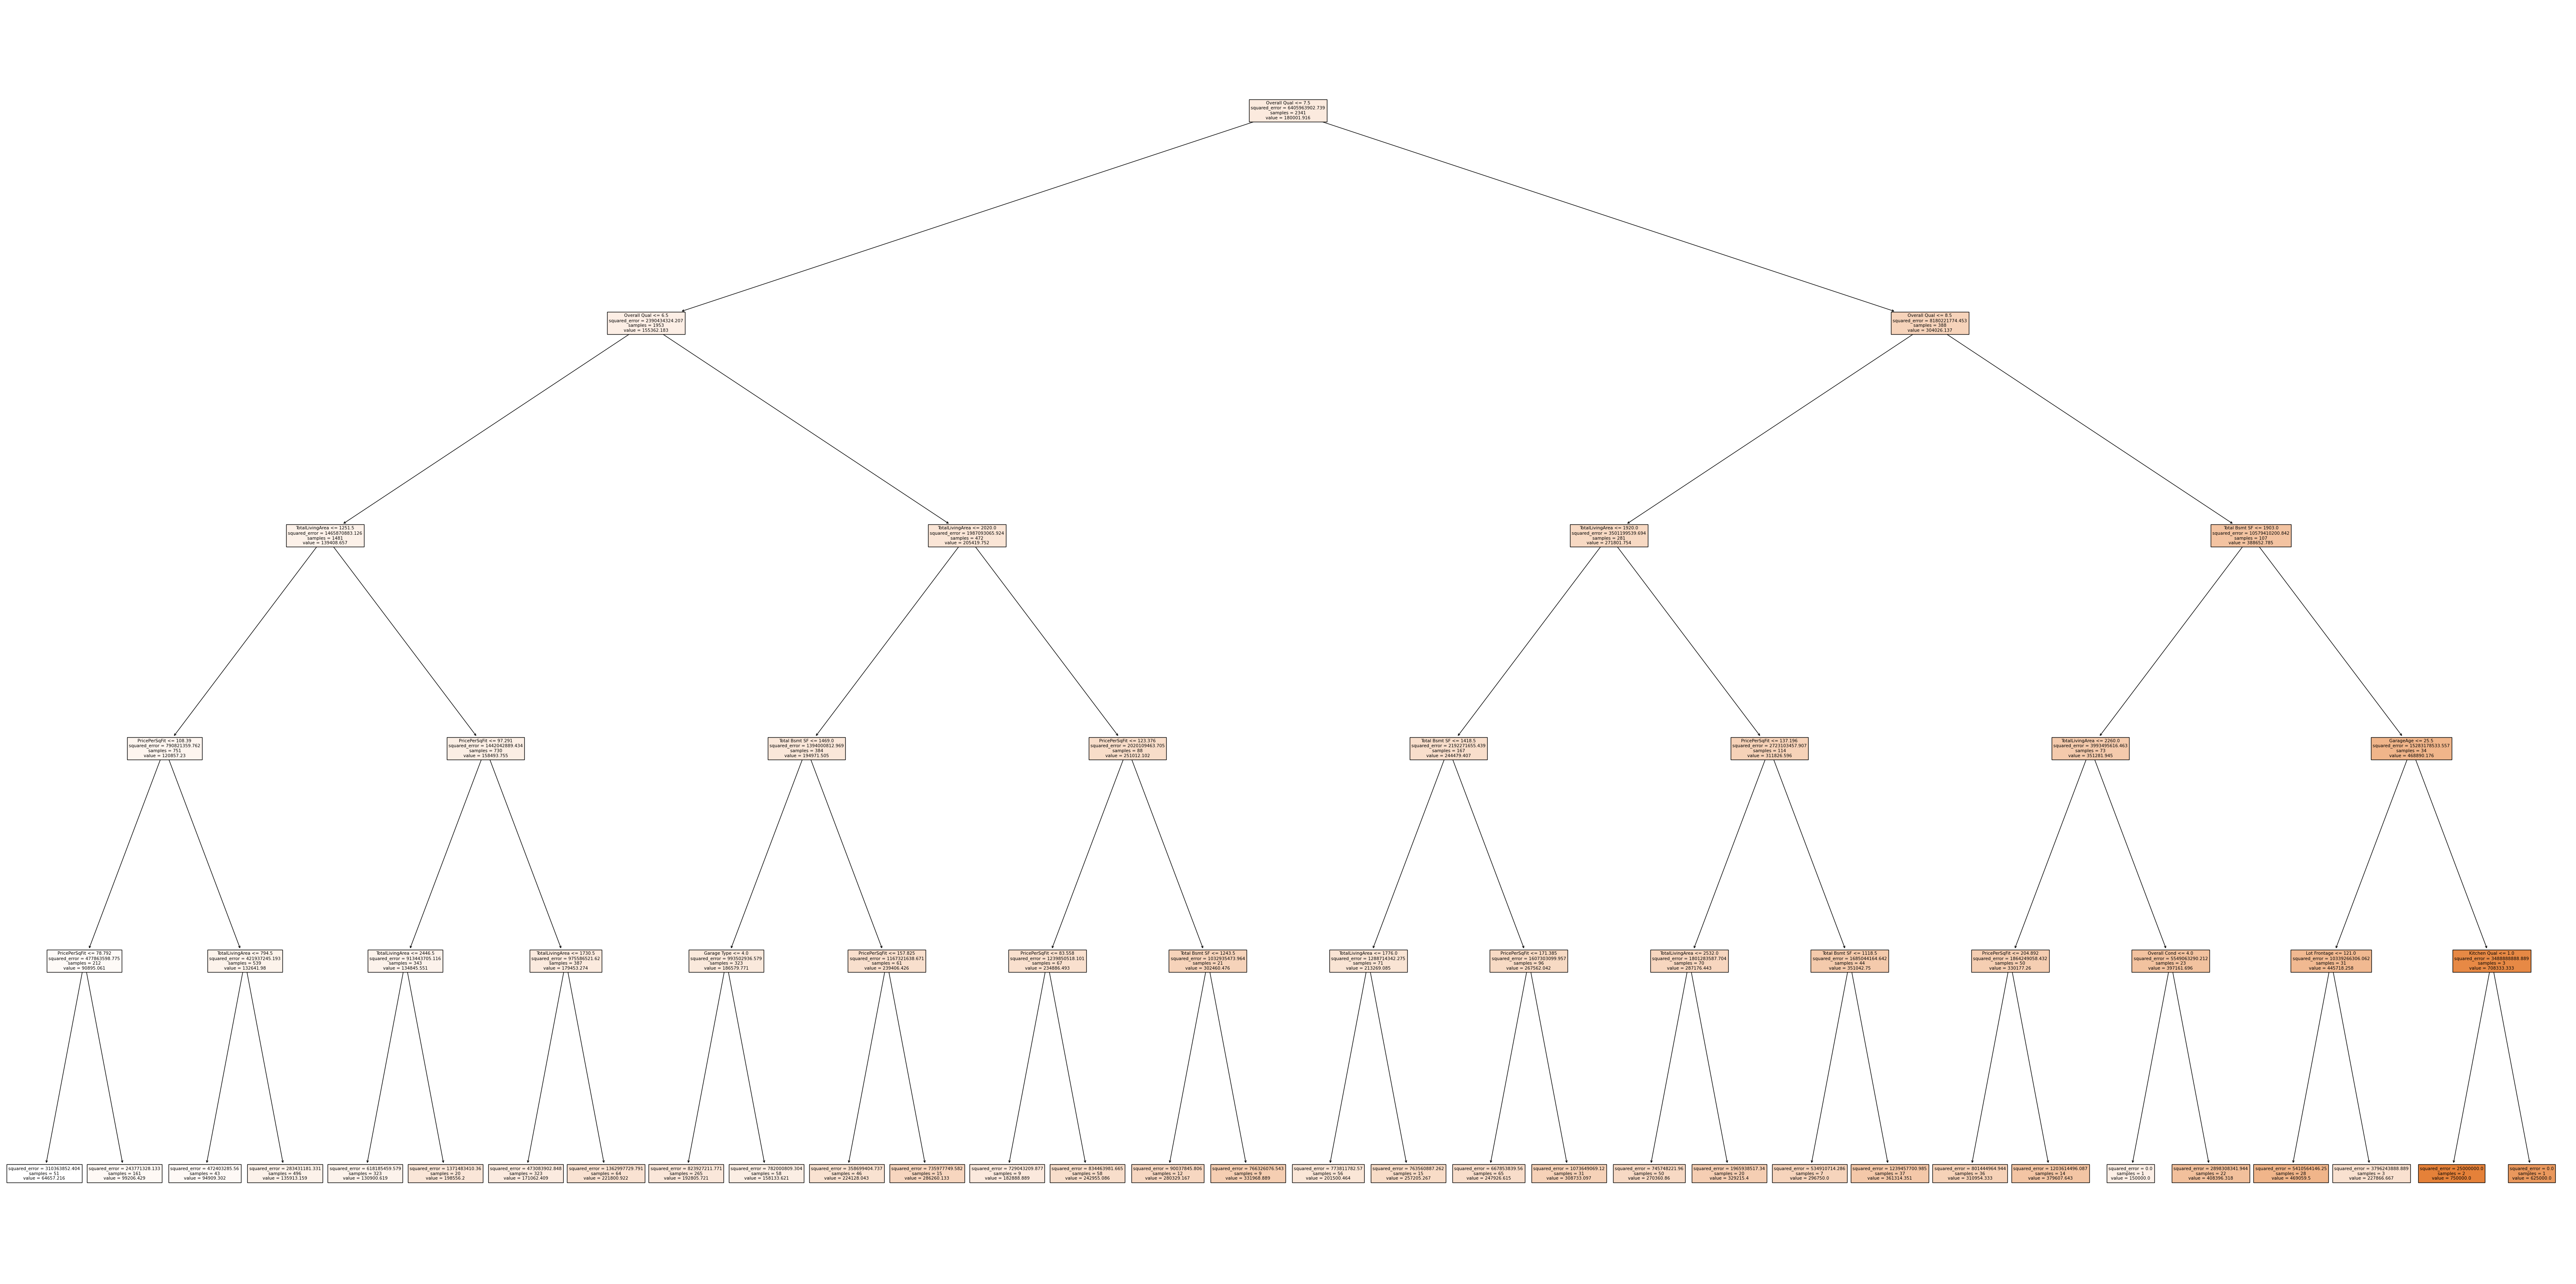

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(criterion="squared_error", max_depth=5)
model.fit(X_train, y_train)


plt.figure(figsize=(80,40))  # Adjusted size for better visibility
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

**DecisionTree Regressor Optimized**

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
param_grid = {
    'max_depth': list(range(5, 100, 5)),
    'min_samples_split': list(range(10, 201, 10)),
    'min_samples_leaf': list(range(10, 101, 10))
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=12),
                              param_grid=param_grid,
                              scoring='neg_mean_squared_error',
                              cv=5,
                              verbose=1)



grid_search.fit(X_train, y_train)


best_dt_model = grid_search.best_estimator_

best_dt_predictions_dt = best_dt_model.predict(X_test)
best_dt_rmse = np.sqrt(mean_squared_error(y_test, best_dt_predictions_dt))
best_dt_mae = mean_absolute_error(y_test, best_dt_predictions_dt)

best_dt_model, best_dt_rmse
print("Root Mean Squared Error:", best_dt_rmse.round(3))
print("Mean Absolute Error:", best_dt_mae.round(3))


Fitting 5 folds for each of 3800 candidates, totalling 19000 fits
Root Mean Squared Error: 26416.55
Mean Absolute Error: 12228.668


In [ ]:
mse_decision_tree = mean_squared_error(y_test, best_dt_predictions_dt)

RSS = mse_decision_tree * n  # Residual Sum of Squares
AIC_dt = n * np.log(RSS / n) + 2 * n_params
BIC_dt = n * np.log(RSS / n) + n_params * np.log(n)
print("AIC Score for Decision Tree:" , AIC_dt)
print("BIC Score for Decision Tree:" ,BIC_dt)

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

cv_scores = cross_val_score(lasso_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
# Calculate the Mean Absolute Error on the test set
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Absolute Error:", mae_lasso.round(3))
cv_scores_mae = cross_val_score(lasso_reg, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores_mae.mean()
print("Lasso Regression Cross-validated Mean Absolute Error:", cv_mae.round(3))
print("Lasso Regression Root Mean Squared Error:",rmse)
print("Lasso Regression Cross-validated Root Mean Squared Error:", np.sqrt(cv_mse).round(3))


In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso = Lasso()
lasso_cv = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
print(f"Best alpha: {lasso_cv.best_params_['alpha']}")
print(f"Best cross-validation score: {lasso_cv.best_score_}")

In [ ]:
RMSE_l = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for Lasso regression:', round(RMSE_l,3))

In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred)

RSS = mse_lasso * n
AIC_lasso = n * np.log(RSS / n) + 2 * n_params
BIC_lasso = n * np.log(RSS / n) + n_params * np.log(n)
print("AIC Score for Lasso Regression:" , AIC_lasso)
print("BIC Score for Lasso Regression:" ,BIC_lasso)

**Ridge Regression**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

kf = KFold(n_splits=10, random_state=42, shuffle=True)
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridgeR = RidgeCV(alphas=ridge_alphas, cv=kf)
ridgeR = ridgeR.fit(X_train, y_train)

y_predRR = ridgeR.predict(X_test)
y_pred_rr = pd.DataFrame(y_predRR).reset_index(drop=True)
y_test_rr = y_test.reset_index(drop=True, inplace=False)

pred_df_rr = pd.concat([y_test_rr,y_pred_rr], axis=1)

plt.scatter(pred_df_rr[0], pred_df_rr['SalePrice'], s=12)
plt.xlabel('Predicted Values')
plt.ylabel('Real Values')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.title('Ridge - Predicted vs Real Sale Prices')
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
cv_scoresR = cross_val_score(ridgeR, X_train, y_train,cv=10, scoring='r2')

print('Ridge Regression Cross Validation R2_score: {}'.format(cv_scoresR.round(3)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scoresR).round(3)))


y_predTrain = ridgeR.predict(X_train)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_predRR))
R2_r = r2_score(y_test, y_predRR)
mae_ridge = mean_absolute_error(y_test, y_predRR)

print("Mean Absolute Error for Ridge Regression:", round(mae_ridge, 3))
print('RMSE for ridge regression:', round(RMSE_l,3))
print('R2 Score:', R2_r)

mse_ridge = mean_squared_error(y_test, y_pred)

RSS = mse_ridge * n  # Residual Sum of Squares
AIC_ridge = n * np.log(RSS / n) + 2 * n_params
BIC_ridge = n * np.log(RSS / n) + n_params * np.log(n)
print("AIC Score for Ridge Regression:" , AIC_ridge)
print("BIC Score for Ridge Regression:" ,BIC_ridge)

# **Extras**

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=495da175ddd489b2bbda3a4173bc3bee99d427d5e006cd0919ed1261add9f01f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Define the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns)

# Choose a specific instance from the test set for explanation
instance_idx = 0  # Choose any index from the test set
instance = X_test.iloc[[instance_idx]]

# Generate explanations for the instance using LIME
explanation = explainer.explain_instance(instance.values[0], model.predict, num_features=len(X.columns))

# Visualize the explanation
explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NotImplementedError: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16

In [ ]:
!pip install shap

import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 1.4 MB/s eta 0:00:00


TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

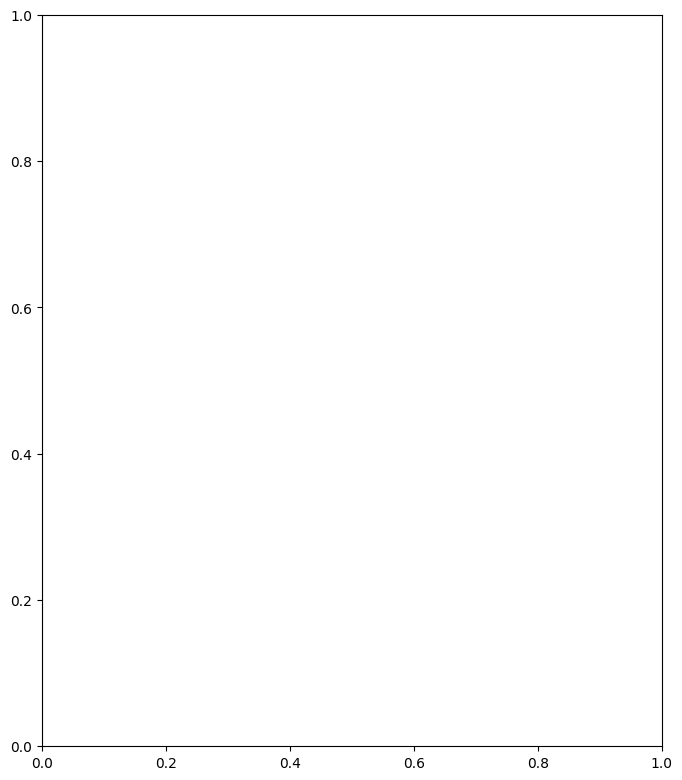

In [ ]:
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


Important attributes:
different answer every time weirdly
Overall_quality is probably the best indicator i see it everywhere for splitting.
kitchen quality, 2nd floor sf, gr living area, total basement sf, neighborhood, 1st floor sf, total basement sf, basement fin, fireplace, land contour, garage cars, garage area, bedroom above garage(wtf?)
many weird splits anyway this looks like doesn't look like it's overfitting so we can decrease purity of leaf nodes and check bottom layers for removing or combining certain features.
we can confirm feature engineering after permutation and shap thingy to see if we agree on any changes that our evident from each one of our analysis.

In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=30, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]
feature_names = X_train.columns
for i in sorted_idx:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f} +/- {perm_importance.importances_std[i]:.4f}")

TotalLivingArea: 0.8927 +/- 0.0180
PricePerSqFit: 0.8111 +/- 0.0176
Exter Qual: 0.0035 +/- 0.0003
Half Bath: 0.0030 +/- 0.0003
Mas Vnr Area: 0.0024 +/- 0.0003
Kitchen AbvGr: 0.0019 +/- 0.0003
Age_Remodified: 0.0015 +/- 0.0002
Bsmt Qual: 0.0013 +/- 0.0002
Open Porch SF: 0.0012 +/- 0.0001
Pool QC: 0.0008 +/- 0.0002
Fireplaces: 0.0008 +/- 0.0002
Full Bath: 0.0006 +/- 0.0001
Overall Cond: 0.0004 +/- 0.0001
Garage Area: 0.0004 +/- 0.0001
Bsmt Half Bath: 0.0004 +/- 0.0001
Overall Qual: 0.0004 +/- 0.0001
BsmtFin Type 1: 0.0003 +/- 0.0001
TotRms AbvGrd: 0.0003 +/- 0.0001
Central Air: 0.0003 +/- 0.0001
IsRenovated: 0.0003 +/- 0.0001
Alley: 0.0003 +/- 0.0001
Kitchen Qual: 0.0002 +/- 0.0001
House Style: 0.0002 +/- 0.0001
Garage Qual: 0.0002 +/- 0.0001
Paved Drive: 0.0002 +/- 0.0001
Exterior 1st: 0.0002 +/- 0.0001
Total Bsmt SF: 0.0002 +/- 0.0001
Screen Porch: 0.0002 +/- 0.0001
Age_Built: 0.0002 +/- 0.0001
Roof Style: 0.0002 +/- 0.0001
Sale Condition: 0.0002 +/- 0.0001
Electrical: 0.0001 +/- 0.000

In [ ]:

'''
import statsmodels.api as sm
from sklearn.inspection import partial_dependence


# X = df.drop('SalePrice', axis=1)
# y = df['SalePrice']

# Add a constant term to the feature matrix for the OLS model
X_with_constant = sm.add_constant(X_train)

# train OLS and find p-values
model = sm.OLS(y_train, X_with_constant).fit()
print(model.summary())

p_values = model.pvalues[1:]

# Select the top features based on p-values
top_features = p_values[p_values < 0.05].index.tolist()
print("Top features:")
print(top_features)


feature_grids = {}
for feature in top_features:
    feature_grids[feature] = np.linspace(X[feature].min(), X[feature].max(), 100)

# Calculate partial dependence values
pd_results = partial_dependence(model, X[top_features], top_features, grid_resolution=100)

# Plot the partial dependence plots
num_features = len(top_features)
num_cols = 2
num_rows = (num_features + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].plot(feature_grids[feature], pd_results[i][0])
    axes[i].set_title(f'Partial Dependence Plot - {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

# Remove any unused subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
'''

In [ ]:
# Select the features you want to visualize
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF']
# Create a grid of values for each feature
grid_points = 50
feature_grids = {}
for feature in features:
    feature_grids[feature] = np.linspace(X[feature].min(), X[feature].max(), grid_points)

# Calculate partial dependence values
pdp_values = {}
for feature in features:
    pdp_values[feature] = []
    for val in feature_grids[feature]:
        X_temp = X_train.copy()
        X_temp[feature] = val
        pdp_values[feature].append(model.predict(X_temp).mean())

# Plot the partial dependence plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].plot(feature_grids[feature], pdp_values[feature])
    axes[i].set_title(f'Partial Dependence Plot - {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [ ]:
corr = X_train.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='magma', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
pd.DataFrame(abs(df.corr()['SalePrice']).sort_values(ascending = False))

#clearly the last columns are not impacting the sale price both for correlation and permutation importance. So we can drop them

NameError: name 'X_train' is not defined

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Exclude the target variable before performing PCA
features_df = df.drop('SalePrice', axis=1)

#categorical variables are already encoded so move to standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features_df)


In [ ]:
###I am applying PCA without mentioning no. of PCs, using variance to find. we could specify if we want as well


# Apply PCA without limiting the number of components to assess variance
pca_full = PCA()
pca_full.fit(df_scaled)

#following steps are performed for finding optima number of n_components rather than specifying

#calculate explained variance ratio for each component
explained_variance = pca_full.explained_variance_ratio_

#calculate cumulative explained variance to determine optimal components
cumulative_variance = np.cumsum(explained_variance)

#now set a threshold and check for components higher than threshold- here considered as 90%
threshold = 0.90
optimal_num_components = np.where(cumulative_variance >= threshold)[0][0] + 1

#assign this value to ncomponents
pca_optimal = PCA(n_components=optimal_num_components)
principal_components_optimal = pca_optimal.fit_transform(df_scaled)

In [ ]:
# Create a scree plot It helps in visualizing how much information (variance) is captured by each component.
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance) + 1), rotation='vertical')  # Rotate the x-axis labels for readability
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#Convert the optimal principal components into a DataFrame
df_principal_components_optimal = pd.DataFrame(data=principal_components_optimal,
                                               columns=[f'PC{i+1}' for i in range(optimal_num_components)],
                                               index=df.index)

# Now df_principal_components_optimal contains the optimal number of components for further analysis.
# This DataFrame will have fewer columns if the optimal number is less than the original number of features.

In [ ]:
print('original df', df.shape, '& df after PCA',df_principal_components_optimal.shape)
#reduced columns from 76 to 51

In [ ]:
new_column_numbers = df_principal_components_optimal.shape[1]
pca = PCA(n_components=new_column_numbers)
df_principal_components_optimal = pca.fit_transform(df)

df_optimal = pd.DataFrame(df_principal_components_optimal,
                                               columns=[f'PC{i+1}' for i in range(new_column_numbers)])
loadings = pd.DataFrame(pca.components_.T, columns=df_optimal.columns, index=df.columns)
most_influential_features = loadings.abs().idxmax()

print("Most influential features on each principal component:")
print(most_influential_features)